# **You're A Winner, Baby!**

**Author:** Anton Reyes

## **Introduction**

### **Requirements and Imports**

#### **Imports**

**Basic Libraries**

* `numpy` contains a large collection of mathematical functions
* `pandas` contains functions that are designed for data manipulation and data analysis

In [101]:
import numpy as np
import pandas as pd

**Visualization Libraries**

* `matplotlib.pyplot` contains functions to create interactive plots
* `seaborn` is a library based on matplotlib that allows for data visualization
* `plotly` is an open-source graphing library for Python.

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Natural Language Processing Libraries**
* `re` is a module that allows the use of regular expressions

In [103]:
import re

#### **Datasets and Files**

The following `csv` file was used for this project:

- `finalists.csv` contains all the finalists of the Drag Race franchise as well as the placements of each contestant in their seasons. Finalists are as of April 22, 2023

## **Data Collection**

Importing the dataset using pandas.

In [104]:
dataset = "data/finalists.csv"

df = pd.read_csv(dataset)
df.head()

,Rank WRE,Rank,Country,Season,Code,W/R/E,Queen,Z-Score,Percent,Score,...,Low,Safe,High,SWin,Win,LSA,T,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1,0,1,1.5,2,NaN,NaN,Never/--,Rank,Rank
1,18.0,8.0,US,AS1,US_AS1,W,Chad Michaels,0.47,100.00%,5.0,...,0,0,1,0.0,3,NaN,NaN,--,"1,220",1
2,131.0,159.0,US,AS1,US_AS1,R,Raven,-2.26,-120.00%,-6.0,...,1,0,1,0.0,0,LSA,2.0,--,237,140
3,77.0,159.0,US,AS1,US_AS1,E,Jujubee,-2.26,-120.00%,-6.0,...,1,0,1,0.0,0,LSA,2.0,--,237,140
4,6.0,8.0,US,AS1,US_AS1,E,Shannel,0.47,100.00%,5.0,...,0,0,1,0.0,3,NaN,NaN,--,"1,220",1


## **Description of the Dataset**

Here, we find the shape of the dataset.

In [105]:
df.shape

(161, 39)

By looking at the `info` of the dataframe, we can see that there are `non-null` values. 

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank WRE     160 non-null    float64
 1   Rank         160 non-null    float64
 2   Country      160 non-null    object 
 3   Season       160 non-null    object 
 4   Code         160 non-null    object 
 5   W/R/E        160 non-null    object 
 6   Queen        160 non-null    object 
 7   Z-Score      160 non-null    float64
 8   Percent      160 non-null    object 
 9   Score        160 non-null    float64
 10  Episode      160 non-null    float64
 11  1            154 non-null    float64
 12  2            154 non-null    float64
 13  3            156 non-null    float64
 14  4            160 non-null    float64
 15  5            159 non-null    float64
 16  6            142 non-null    float64
 17  7            139 non-null    float64
 18  8            93 non-null     float64
 19  9       

The dataset itself contains the progress of all contestants in all the different franchises of Drag Race. That being said, the original file (in Google Sheets) contains more than 10 tabs for the different franchises, seasons, and countries - and it's still growing. 

Manually, I take the data/progess for each contestant that reach the final episode - the finalists. 

As we can see from the `Queen` column, there are 160 finalists regardless of season. This is because there are repeating finalists due to All-Star seasons. 

## **Exploratory Data Analysis Part 1**

The following questions are asked to guide the EDA.

1. How many finalists are there per class?
2. How many unique values are there in the `Season` column?
3. How many unique values are there in the `Country` column?
4. What are measures of central tendency in the `Episode` column?

### **1. How many finalists are there per class?**

Before getting the number of contestants per class, we first define the classes:

| Class | Meaning | Definition |
|:---:|---| --- |
| W | Winner | Contestant has won the season |
| R | Runner-Up | Contestant became the runner-up or placed 2nd |
| E | Elimenated | Contestant was elimenated at the finale and placed 3rd/4th |

With that, we now get the total of contestants by counting them in the `W/R/E` column.

In [107]:
df[["W/R/E"]].count()

W/R/E    160
dtype: int64

Now, we get the division of classes between all 160 contestants by printing the `.value_counts()` and summing it all up to measure.

In [108]:
print("Division of classes:", df[["W/R/E"]].value_counts())
print("Sum of the classes:", df[["W/R/E"]].value_counts().sum())

Division of classes: W/R/E
R        69
W        46
E        45
dtype: int64
Sum of the classes: 160


### **2. How many unique values are there in the `Season` column?**

Similar to the previous question, we first get the count of seasons available.

In [109]:
df[['Season']].count()

Season    160
dtype: int64

From getting the value counts in the `Season` column, we can see that there are inconsistensies in the dataset. Here, we can take note of how to format the dataset when it comes to preprocessing the dataframe.

In [110]:
df[['Season']].value_counts()

Season
1         26
S1        24
2         16
S2        10
3          7
14         5
15         4
AS6        4
S13        4
S11        4
AS7        4
S10        4
AS4        4
AS3        4
AS2        4
AS1        4
4          4
S9         4
AS5        3
S12        3
S3         3
S4         3
S5         3
S6         3
S7         3
S8         3
dtype: int64

### **3. How many unique values are there in the `Country` column?**

In [111]:
df[["Country"]].count()

Country    160
dtype: int64

By seeing the value counts in the `Country` column, we can observer that there are multiple values. However, countries with `_WORLD` just classify them as a different country rather then a *type* of season. When in fact, `_WORLD` seasons are similar to an All Star season.

In [112]:
df[["Country"]].value_counts()

Country  
US           79
UK           14
CAN          10
ESP           8
AUS           7
HOL           7
ITA           7
THI           6
CAN_WORLD     4
FRA           4
PH            4
UK_WORLD      4
BEL           3
SWE           3
dtype: int64

### **4. What are the measure of central tendency in the `Episode` column?**

First, we check the data type in the `Episode` column.

In [113]:
df['Episode'].dtypes

dtype('float64')

Since the values in the episode column are floats, we can `describe` the column to get the inferential statistics.

In [114]:
df["Episode"].describe()

count    160.00000
mean       8.81875
std        2.40511
min        5.00000
25%        7.00000
50%        9.00000
75%       11.00000
max       13.00000
Name: Episode, dtype: float64

In [115]:
print("Max:", df['Episode'].max()),
print("Min:", df['Episode'].min()),
print("Range:", df['Episode'].max() - df['Episode'].min())

Max: 13.0
Min: 5.0
Range: 8.0


## **Data Preprocessing**

#### **Data Preprocessing**

##### **Dropping Unneeded Columns**

This dataset has been worked on in a Google Sheet in order to record multiple franchises at once. That being said, the analysis itself has been done in the same sheet. This resulted into a lot of columns with formulas rather than actual data.

In [116]:
df.head()

,Rank WRE,Rank,Country,Season,Code,W/R/E,Queen,Z-Score,Percent,Score,...,Low,Safe,High,SWin,Win,LSA,T,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1,0,1,1.5,2,NaN,NaN,Never/--,Rank,Rank
1,18.0,8.0,US,AS1,US_AS1,W,Chad Michaels,0.47,100.00%,5.0,...,0,0,1,0.0,3,NaN,NaN,--,"1,220",1
2,131.0,159.0,US,AS1,US_AS1,R,Raven,-2.26,-120.00%,-6.0,...,1,0,1,0.0,0,LSA,2.0,--,237,140
3,77.0,159.0,US,AS1,US_AS1,E,Jujubee,-2.26,-120.00%,-6.0,...,1,0,1,0.0,0,LSA,2.0,--,237,140
4,6.0,8.0,US,AS1,US_AS1,E,Shannel,0.47,100.00%,5.0,...,0,0,1,0.0,3,NaN,NaN,--,"1,220",1


Using pandas, we get all the columns in the dataframe into a list for easier reading.

In [117]:
df.columns

Index(['Rank WRE', 'Rank', 'Country', 'Season', 'Code', 'W/R/E', 'Queen',
       'Z-Score', 'Percent', 'Score', 'Episode', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', '10', '11', '12', '13', '14', '15', 'Mean: 3.11',
       'Unnamed: 27', 'Bttm', 'Low', 'Safe', 'High', 'SWin', 'Win', 'LSA', 'T',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38'],
      dtype='object')

After getting the list of columns, we now make a list of columns to drop.

The columns below are the columns that were done using formulas in Google Sheets. 

In [118]:
drop_col = ['Rank WRE', 'Rank', 'Code', 'Episode', 'Percent', 'Score', 
            'Mean: 3.11', 'Z-Score', 'Unnamed: 27', 'Bttm', 'Low',
            'Safe', 'High', 'SWin', 'Win', 'LSA', 'T', 'Unnamed: 36', 
            'Unnamed: 37', 'Unnamed: 38']

Because of an extra row to further divide the original dataset in Google Sheets, we drop the first row since it won't be usable in any way.

In [119]:
df = df.drop(drop_col, axis=1) #Dropping the list of columns
df = df.iloc[1:,:] #Dropping the first row

In [120]:
df.head() #checking the dataset

,Country,Season,W/R/E,Queen,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,US,AS1,W,Chad Michaels,-2.0,1.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US,AS1,R,Raven,1.0,-1.0,-2.0,-2.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US,AS1,E,Jujubee,1.0,-1.0,-2.0,-2.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US,AS1,E,Shannel,-2.0,1.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,US,AS2,W,Alaska,1.0,2.0,0.0,2.0,2.0,2.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### **Regex Functions**

Because on inconsistencies in the `Country` and `Season` columns, we make functions using RegEx to do so. Because the functions will be removing certain characters and strings, another column will be created later on to help specify certain seasons.

Other functions will be used later on.

In [121]:
#regex function to remove S but not remove the S in AS
def remove_s(x):
    return re.sub(r'S', '', x)

#regex function to remove AS and _WORLD
def remove_as(x):
    return re.sub(r'AS|_WORLD', '', x)

#regex function to remove the letter A
def remove_a(x):
    return re.sub(r'A', '', x)


##### **Removing `S` from the Season column**

Here, we apply the `remove_s` function to remove seasons that have the letter `S` even though the number already indicated the season.

In [122]:
df['Season'] = df['Season'].apply(remove_s)
df['Season'].value_counts()

1     50
2     26
3     10
4      7
14     5
A7     4
A6     4
9      4
A2     4
A1     4
13     4
11     4
10     4
A4     4
A3     4
15     4
12     3
5      3
6      3
7      3
8      3
A5     3
Name: Season, dtype: int64

With this new column, the S has been removed and only the All Stars Seasons are identified

##### **Regex Functions for New Column**

After removing the `S` in the `Season` column, we now make functions to extract certain strings to a new column to identify the season if it was a Regular, All Star, or World season.

In [123]:
def identify_world(x):
    if '_WORLD' in x:
        return 'WORLD',
    
def identify_as(x):    
    if 'A' in x:
        return 'AS'

def identify_reg(x):
    if 'A' not in x:
        return 'REG'
    
def remove_world_reg(df, column_name):
    df[column_name] = df[column_name].str.replace(r"\('WORLD',\)REG", "WORLD", regex=True)
    return df
    


##### **Extracting the formats**

By using the functions, we now apply it to their respective columns. We also replace `None` values as empty strings so that when it comes to joining the three columns, there would be no problem.

In [124]:
df['world'] = df['Country'].apply(identify_world).astype(str)
df['world'] = df['world'].replace('None', '')
df['world'].value_counts()

              152
('WORLD',)      8
Name: world, dtype: int64

In [125]:
df['allstars'] = df['Season'].apply(identify_as).astype(str)
df['allstars'] = df['allstars'].replace('None', '')
df['allstars'].value_counts()

      133
AS     27
Name: allstars, dtype: int64

In [126]:
df['regular'] = df['Season'].apply(identify_reg).astype(str)
df['regular'] = df['regular'].replace('None', '')
df['regular'].value_counts()

REG    133
        27
Name: regular, dtype: int64

In [127]:
#joining two columns into one column
df['format'] = df['world'] + df['allstars'] + df['regular']

df['format'] = df['format'].replace(np.nan, 'REG')

df['format'].value_counts()

REG              125
AS                27
('WORLD',)REG      8
Name: format, dtype: int64

After joining all the new columns, we can see that the column for World seasons show `('WORLD',)REG` instead of `WORLD`. This will later be on cleaned to fit the format needed to make it readable and understandable at a glance.

#### **Data Cleaning**

##### **Fixing the Columns**

After extracting all the needed information, we can now clean the columns accordingly since the functions rely on certain strings to function.

By using the previously made RegEx functions we now remove the letter `A` in the `Season` column.

In [128]:
df['Season'] = df['Season'].apply(remove_a)
df['Season'].value_counts()

1     54
2     30
3     14
4     11
6      7
7      7
5      6
14     5
10     4
11     4
13     4
9      4
15     4
12     3
8      3
Name: Season, dtype: int64

Similar to the previous cell, we now fix the format of the `format` column for those with the `('WORLD',)REG` to `WORLD` instead.

In [129]:
df = remove_world_reg(df, 'format')
df['format'].value_counts()

REG      125
AS        27
WORLD      8
Name: format, dtype: int64

##### **Removing Type in Season**

We now remove the string `_WORLD` column since we've already identified in another column which season and country is a `WORLD` season.

In [130]:
df['Country'] = df['Country'].apply(remove_as)
df['Country'].value_counts()

US     79
UK     18
CAN    14
ESP     8
HOL     7
AUS     7
ITA     7
THI     6
FRA     4
PH      4
BEL     3
SWE     3
Name: Country, dtype: int64

##### **Changing Placement Values**

In the original dataset, values included negative values; Specifically `-2` and `-1` which indicated Bottom 2 and Low placements, respectively. In order to have a better 'view' of the scores and placements, we first make a lsit of episodes.

In [131]:
episodes =[ '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']

After making the list, we now replace the values in the `episodes` columns using the pandas function `replace` as well as using a dictionary.

The following placement values will be replaced as follows:

|Old Value|New Value|Placement|Meaning|
|:---:|:---:|---|---|
|-2|0|Bottom 2|Was up for elimination|
|-1|1|Low|Received negative critqiues, but not up for elimination|
|0|2|Safe|Not high or low|
|1|3|High|Received positive critiques, but did not win the challenge or in select seasons, not part of the Top 2|
|1.5|4|Top 2|Top 2 contestants of the week, but lost the lipsync. Applicable to All Starts, World, and selected episodes in regular seasons|
|2|5|Win|Won the main challenge or in some seasons/episodes, won the Top 2 lipsync|

In [132]:
#replacing values with another value in multiple columns
df[episodes] = df[episodes].replace({
    -2 : 0, #Bottom 2 placement
    -1 : 1, #Received negative critiques, but was not up for elimination   
    0 : 2, #Safe 
    1 : 3, #Received positive critiques, but did not win the challenge 
    1.5 : 4, #Top 2 contestants (Applicable in All Stars and World seasons and selected episodes in regular seasons) but lost the lipsync
    2 : 5 #Won the main challenge
    })

Here, we used the `.describe()` function to see the inferential statistics of each episode.

In [133]:
df[episodes].describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,154.000000,154.000000,156.000000,160.000000,159.000000,142.000000,139.000000,93.000000,89.000000,51.000000,54.000000,43.000000,13.000000,9.000000
mean,2.629870,2.538961,2.493590,2.646875,2.698113,2.549296,2.438849,2.591398,2.617978,2.411765,2.833333,2.255814,2.461538,1.888889
std,1.231139,1.473660,1.452459,1.618094,1.697931,1.578119,1.711492,1.764607,1.805960,1.779623,1.701830,1.329035,1.941451,1.536591
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000
75%,3.000000,3.000000,3.000000,4.000000,5.000000,3.000000,3.000000,4.000000,5.000000,3.500000,4.750000,3.000000,3.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


##### **Sum of placement scores**

Because of the previously dropped score column we now make a new one with the new values that were just replaced. We sum the episode columns and add it to a new column.

In [134]:
#sum all numbers per row in columns 1-14
df['score'] = df[episodes].sum(axis=1)

df

,Country,Season,W/R/E,Queen,1,2,3,4,5,6,...,11,12,13,14,15,world,allstars,regular,format,score
1,US,1,W,Chad Michaels,0.0,3.0,5.0,5.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,,AS,,AS,18.0
2,US,1,R,Raven,3.0,1.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,,AS,,AS,4.0
3,US,1,E,Jujubee,3.0,1.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,,AS,,AS,4.0
4,US,1,E,Shannel,0.0,3.0,5.0,5.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,,AS,,AS,18.0
5,US,2,W,Alaska,3.0,5.0,2.0,5.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,,AS,,AS,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,BEL,1,W,Drag Couenne,3.0,5.0,2.0,5.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,,,REG,REG,25.0
157,BEL,1,E,Susan,2.0,1.0,5.0,0.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,,,REG,REG,13.0
158,SWE,1,W,Admira Thunderpussy,3.0,2.0,2.0,5.0,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,,,REG,REG,23.0
159,SWE,1,R,Fontana,2.0,2.0,1.0,2.0,0.0,5.0,...,NaN,NaN,NaN,NaN,NaN,,,REG,REG,14.0


##### **Placement Count**

Here, we count the number of placements for each contestants in the `episodes` columns. 

For each placement, there is a designated column.

In [135]:
#count the number of 0, 1, 2, 3, 4, 5 in each row per contestant
df['bottom'] = df[episodes].eq(0).sum(axis=1)
df['low'] = df[episodes].eq(1).sum(axis=1)
df['safe'] = df[episodes].eq(2).sum(axis=1)
df['high'] = df[episodes].eq(3).sum(axis=1)
df['semiwin'] = df[episodes].eq(4).sum(axis=1)
df['win'] = df[episodes].eq(5).sum(axis=1)

In [136]:
placement = ['bottom', 'low', 'safe', 'high', 'semiwin', 'win']

df

,Country,Season,W/R/E,Queen,1,2,3,4,5,6,...,allstars,regular,format,score,bottom,low,safe,high,semiwin,win
1,US,1,W,Chad Michaels,0.0,3.0,5.0,5.0,5.0,NaN,...,AS,,AS,18.0,1,0,0,1,0,3
2,US,1,R,Raven,3.0,1.0,0.0,0.0,0.0,NaN,...,AS,,AS,4.0,3,1,0,1,0,0
3,US,1,E,Jujubee,3.0,1.0,0.0,0.0,0.0,NaN,...,AS,,AS,4.0,3,1,0,1,0,0
4,US,1,E,Shannel,0.0,3.0,5.0,5.0,5.0,NaN,...,AS,,AS,18.0,1,0,0,1,0,3
5,US,2,W,Alaska,3.0,5.0,2.0,5.0,5.0,5.0,...,AS,,AS,25.0,1,0,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,BEL,1,W,Drag Couenne,3.0,5.0,2.0,5.0,2.0,3.0,...,,REG,REG,25.0,0,0,2,2,0,3
157,BEL,1,E,Susan,2.0,1.0,5.0,0.0,3.0,1.0,...,,REG,REG,13.0,1,3,1,1,0,1
158,SWE,1,W,Admira Thunderpussy,3.0,2.0,2.0,5.0,5.0,1.0,...,,REG,REG,23.0,0,1,2,1,0,3
159,SWE,1,R,Fontana,2.0,2.0,1.0,2.0,0.0,5.0,...,,REG,REG,14.0,1,1,4,0,0,1


##### **Final Column Fixes**

In preparation for the another set of EDA, we must prepare the dataframe in a better order. We first get all the columns in their current order:

In [137]:
df.columns

Index(['Country', 'Season', 'W/R/E', 'Queen', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', '10', '11', '12', '13', '14', '15', 'world', 'allstars',
       'regular', 'format', 'score', 'bottom', 'low', 'safe', 'high',
       'semiwin', 'win'],
      dtype='object')

Because of the new adjustments, we have to drop columns again before anything else so that we can only see the usefeul features.

In [138]:
drop_col = ['15', 'world', 'allstars', 'regular']
df = df.drop(drop_col, axis=1)
df

,Country,Season,W/R/E,Queen,1,2,3,4,5,6,...,13,14,format,score,bottom,low,safe,high,semiwin,win
1,US,1,W,Chad Michaels,0.0,3.0,5.0,5.0,5.0,NaN,...,NaN,NaN,AS,18.0,1,0,0,1,0,3
2,US,1,R,Raven,3.0,1.0,0.0,0.0,0.0,NaN,...,NaN,NaN,AS,4.0,3,1,0,1,0,0
3,US,1,E,Jujubee,3.0,1.0,0.0,0.0,0.0,NaN,...,NaN,NaN,AS,4.0,3,1,0,1,0,0
4,US,1,E,Shannel,0.0,3.0,5.0,5.0,5.0,NaN,...,NaN,NaN,AS,18.0,1,0,0,1,0,3
5,US,2,W,Alaska,3.0,5.0,2.0,5.0,5.0,5.0,...,NaN,NaN,AS,25.0,1,0,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,BEL,1,W,Drag Couenne,3.0,5.0,2.0,5.0,2.0,3.0,...,NaN,NaN,REG,25.0,0,0,2,2,0,3
157,BEL,1,E,Susan,2.0,1.0,5.0,0.0,3.0,1.0,...,NaN,NaN,REG,13.0,1,3,1,1,0,1
158,SWE,1,W,Admira Thunderpussy,3.0,2.0,2.0,5.0,5.0,1.0,...,NaN,NaN,REG,23.0,0,1,2,1,0,3
159,SWE,1,R,Fontana,2.0,2.0,1.0,2.0,0.0,5.0,...,NaN,NaN,REG,14.0,1,1,4,0,0,1


For better calling, we now make all the columns lowercase through mapping.

In [139]:
#lowercase all column names
df.columns = map(str.lower, df.columns)

#### **Feature Selection**

With the new columns in the main dataframe, we check all the current columns in a list using the `.columns` function.

In [140]:
df.columns

Index(['country', 'season', 'w/r/e', 'queen', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', '10', '11', '12', '13', '14', 'format', 'score',
       'bottom', 'low', 'safe', 'high', 'semiwin', 'win'],
      dtype='object')

**Select and reordered columns**

To better organize certain data for their own uses, we separate the dataframes based on certain features

In [141]:
df_scores = df[['season', 'country', 'format', 'w/r/e', 'queen', 'score',
                '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']]

df_scores.head()

,season,country,format,w/r/e,queen,score,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,1,US,AS,W,Chad Michaels,18.0,0.0,3.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,US,AS,R,Raven,4.0,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,US,AS,E,Jujubee,4.0,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,US,AS,E,Shannel,18.0,0.0,3.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,US,AS,W,Alaska,25.0,3.0,5.0,2.0,5.0,5.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
df_placements = df[['season', 'country', 'format', 'w/r/e', 'queen', 'score',
       'bottom', 'low', 'safe', 'high', 'semiwin', 'win']]

df_placements.head()

,season,country,format,w/r/e,queen,score,bottom,low,safe,high,semiwin,win
1,1,US,AS,W,Chad Michaels,18.0,1,0,0,1,0,3
2,1,US,AS,R,Raven,4.0,3,1,0,1,0,0
3,1,US,AS,E,Jujubee,4.0,3,1,0,1,0,0
4,1,US,AS,E,Shannel,18.0,1,0,0,1,0,3
5,2,US,AS,W,Alaska,25.0,1,0,1,1,0,4


## **Exploratory Data Analysis Part 2**

The following questions are asked to guide the EDA.

1. What are the inferential statistics of the score column?
2. How many repeating finalists are there?
3. Which seasons and countries are the duplicated finalists from?
4. What is the correlation between the scores and placement counts?
5. What is the average placement count per w/r/e?
6. What is the average episode placement per w/r/e?

### **1.What are the inferential statistics of the scores?**

In [143]:
df_scores['score'].describe()

count    160.000000
mean      22.715625
std        8.088858
min        4.000000
25%       17.000000
50%       23.000000
75%       29.000000
max       41.000000
Name: score, dtype: float64

In [144]:
df_scores['score'].max()-df_scores['score'].min()

37.0

### **2. How many repeating finalists are there?**

In [145]:
df_scores['queen'].count()

160

In [146]:
#names of the queens with duplicates more than 1
df_scores['queen'].value_counts().head(15)


Jujubee                 4
Shea Coulee             3
Trinity the Tuck        3
Chad Michaels           2
Eureka                  2
Ginger Minj             2
Naomi Smalls            2
Monet X Change          2
Jinkx Monsoon           2
Raven                   2
Ra'jah O'Hara           2
Roxxxy Andrews          2
Silky Nutmeg Ganache    2
Alaska                  2
Baga Chipz              2
Name: queen, dtype: int64

### **3. Which seasons and countries are the duplicated finalists from?**

In [147]:
queens = df_scores[['season', 'country', 'format', 'w/r/e', 'queen', 'score']]

In [148]:
queen_duplicates = queens[queens.duplicated(['queen'], keep=False)]
queen_duplicates['queen'].count()

36

In [149]:
#show duplicated queens and the country and season they were in
queen_duplicates.groupby(['queen', 'country', 'format', 'season']).first()


w/r/e  score
queen                country format season             
Alaska               US      AS     2          W   25.0
                             REG    5          R   29.0
Baga Chipz           UK      REG    1          E   21.0
                             WORLD  1          E   11.0
Chad Michaels        US      AS     1          W   18.0
                             REG    4          R   31.0
Eureka               US      AS     6          R   28.0
                             REG    10         R   30.0
Ginger Minj          US      AS     6          R   26.0
                             REG    7          R   32.0
Jinkx Monsoon        US      AS     7          W   35.0
                             REG    5          W   34.0
Jujubee              UK      WORLD  1          E    7.0
                     US      AS     1          E    4.0
                                    5          R   21.0
                             REG    2          E   14.0
Monet X Change       US      AS     4          W   20.0
                                    7          R   33.0
Naomi Smalls         US      AS     4          E   18.0
                             REG    8          R   21.0
Ra'jah O'Hara        CAN     WORLD  1          W   11.0
                     US      AS     6          R   26.0
Raven                US      AS     1          R    4.0
                             REG    2          R   23.0
Rita Baga            CAN     REG    1          R   24.0
                             WORLD  1          E   13.0
Roxxxy Andrews       US      AS     2          E    7.0
                             REG    5          R   31.0
Shea Coulee          US      AS     5          W   18.0
                                    7          E   33.0
                             REG    9          E   37.0
Silky Nutmeg Ganache CAN     WORLD  1          R   12.0
                     US      REG    11         E   29.0
Trinity the Tuck     US      AS     4          W   26.0
                                    7          E   33.0
                             REG    9          E   31.0

### **4. What is the correlation between the scores and placement counts?**

<AxesSubplot:>

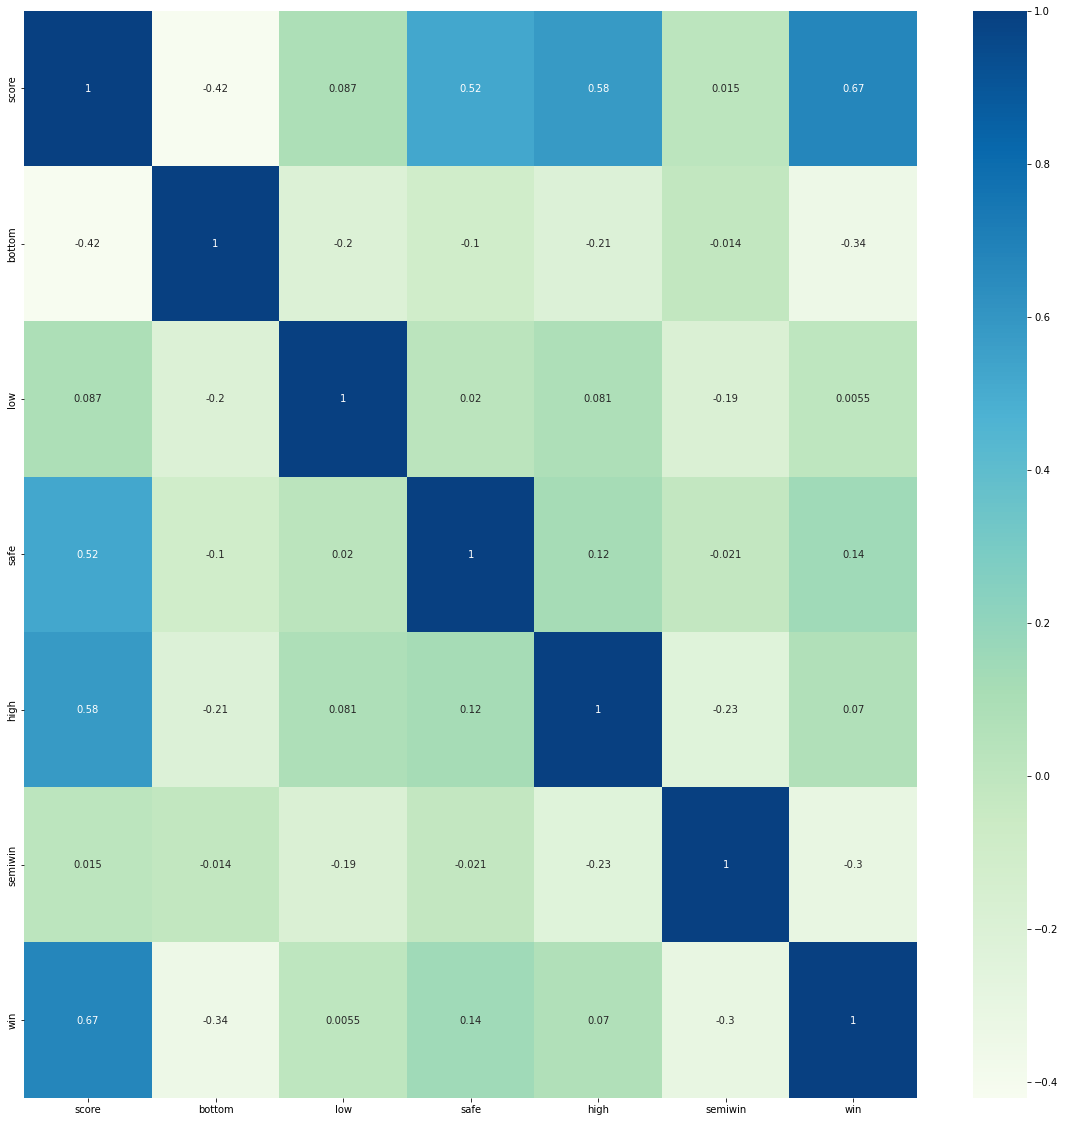

In [156]:
plt.figure(figsize=(20,20))

sns.heatmap(df_placements.corr(), annot=True, cmap='GnBu')

### **5. What is the average placement count per w/r/e?**

In [172]:
df_placements.groupby('w/r/e').mean().round(2)

,score,bottom,low,safe,high,semiwin,win
w/r/e,,,,,,,
E,20.51,1.71,0.73,2.58,2.22,0.27,1.38
R,22.29,1.22,0.80,2.64,2.14,0.29,1.72
W,25.51,0.76,0.52,2.63,2.30,0.35,2.28


### **6. What are the measures of central tendency of the episode placement per w/r/e?**

In [173]:
df_scores.groupby('w/r/e')[episodes].mean().round(2)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14
w/r/e,,,,,,,,,,,,,,
E,2.37,2.35,2.50,2.33,2.58,2.00,1.73,2.73,2.42,1.93,2.67,1.85,2.71,1.6
R,2.70,2.14,2.24,2.59,2.51,2.76,2.67,2.55,2.46,2.36,3.17,2.61,0.67,3.5
W,2.77,3.31,2.87,3.03,3.09,2.74,2.73,2.52,3.04,3.00,2.47,2.17,3.67,1.0


In [175]:
df_scores.groupby('w/r/e')[episodes].median()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
w/r/e,,,,,,,,,,,,,,
E,2.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0
R,2.0,2.0,2.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,2.0,0.0,3.5
W,2.5,3.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,1.0


In [181]:
df_scores.groupby('w/r/e')[episodes].agg(lambda x:x.value_counts().index[0])

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
w/r/e,,,,,,,,,,,,,,
E,2.0,3.0,2.0,2.0,3.0,2.0,0.0,5.0,3.0,0.0,3.0,2.0,3.0,2.0
R,2.0,2.0,2.0,3.0,2.0,3.0,5.0,5.0,3.0,3.0,3.0,2.0,0.0,2.0
W,2.0,5.0,2.0,5.0,5.0,2.0,3.0,3.0,5.0,5.0,5.0,2.0,3.0,2.0


# **Saving Dataframes as CSVs**

In [183]:
#df_scores.to_csv('dash data/finalist_scores.csv')
#df_placements.to_csv('dash data/finalist_placements.csv')
